In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [29]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0  # Flatten and normalize
x_test = x_test.reshape(-1, 784) / 255.0

In [31]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [32]:
y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)

In [33]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.02, l2_lambda=0.0003):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.weights1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.weights2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))

    def forward(self, x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.a1 = np.maximum(0, self.z1)  # ReLU activation
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        exp_scores = np.exp(self.z2 - np.max(self.z2, axis=1, keepdims=True))
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return self.probs

    def backward(self, x, y):
        num_samples = x.shape[0]
        delta3 = self.probs - y
        dW2 = (1 / num_samples) * np.dot(self.a1.T, delta3) + self.l2_lambda * self.weights2
        db2 = (1 / num_samples) * np.sum(delta3, axis=0, keepdims=True)
        delta2 = np.dot(delta3, self.weights2.T) * (self.a1 > 0)
        dW1 = (1 / num_samples) * np.dot(x.T, delta2) + self.l2_lambda * self.weights1
        db1 = (1 / num_samples) * np.sum(delta2, axis=0, keepdims=True)
        self.weights1 -= self.learning_rate * dW1
        self.weights2 -= self.learning_rate * dW2
        self.bias1 -= self.learning_rate * db1
        self.bias2 -= self.learning_rate * db2

    def compute_loss(self, y):
        log_probs = -np.log(self.probs[range(len(y)), np.argmax(y, axis=1)])
        data_loss = np.sum(log_probs) / len(y)
        data_loss += (self.l2_lambda / 2) * (np.sum(np.square(self.weights1)) + np.sum(np.square(self.weights2)))
        return data_loss

    def train(self, x, y, epochs):
        for epoch in range(epochs):
            self.forward(x)
            self.backward(x, y)
            if epoch % 100 == 0:
                loss = self.compute_loss(y)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, x):
        probs = self.forward(x)
        return np.argmax(probs, axis=1)

In [34]:
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.02
epochs = 1000

In [35]:
nn_l2 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate, l2_lambda=0.0003)
nn_l2.train(x_train, y_train_encoded, epochs)

Epoch 0, Loss: 2.5121
Epoch 100, Loss: 1.0038
Epoch 200, Loss: 0.8265
Epoch 300, Loss: 0.7450
Epoch 400, Loss: 0.6943
Epoch 500, Loss: 0.6587
Epoch 600, Loss: 0.6323
Epoch 700, Loss: 0.6119
Epoch 800, Loss: 0.5957
Epoch 900, Loss: 0.5823


In [36]:
predictions = nn_l2.predict(x_test)
accuracy = np.mean(predictions == np.argmax(y_test_encoded, axis=1))
print(f"Test Accuracy (Adjusted L2 Regularization): {accuracy:.4f}")

Test Accuracy (Adjusted L2 Regularization): 0.8153


In [37]:
def plot_predictions(X, y_true, y_pred, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[i]}\nPred: {y_pred[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

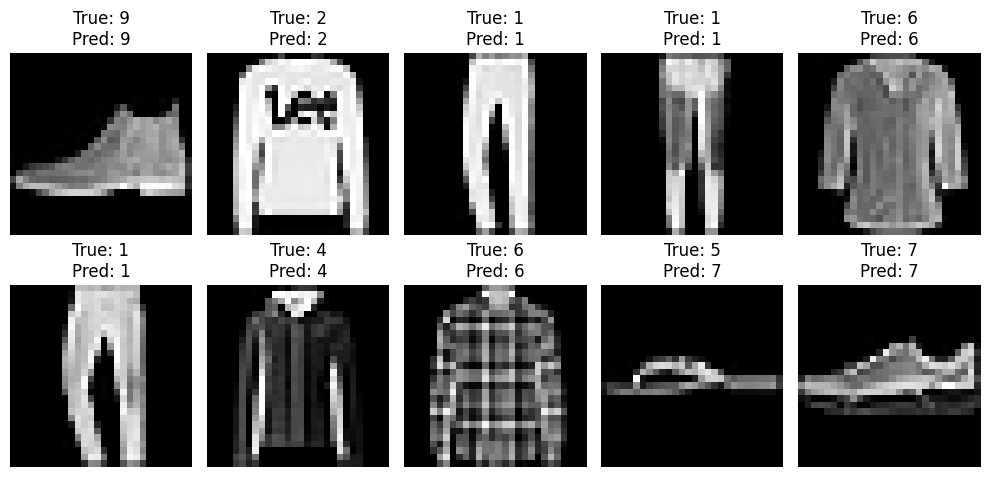

In [38]:
plot_predictions(x_test, y_test, predictions)
